<a href="https://colab.research.google.com/github/Narenderreddyranabothu/Applied-data-science/blob/main/Mahadev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload()

Saving household_power_consumption.txt to household_power_consumption.txt


Initial DataFrame:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
Shape of the DataFrame: (2075259, 9)
Data types of each column:
Date                      object
Time         

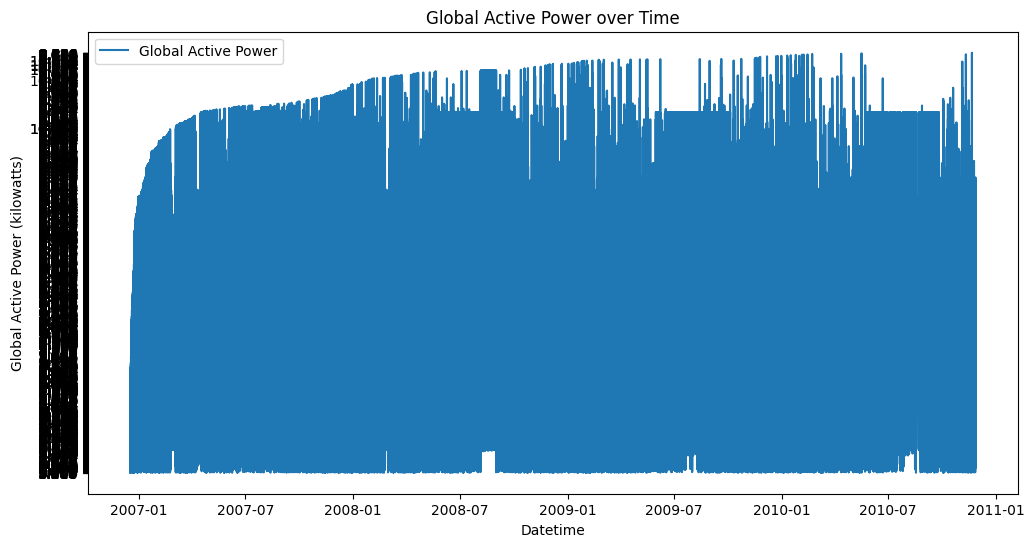

In [6]:
# Step 2: Import necessary libraries
import pandas as pd

# Step 3: Read the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Step 4: Display the first few rows
print("Initial DataFrame:")
print(df.head())

# Step 5: Check the shape and data types
print("Shape of the DataFrame:", df.shape)
print("Data types of each column:")
print(df.dtypes)

# Step 6: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Step 7: Drop rows with missing values (if any)
df.dropna(inplace=True)

# Step 8: Convert 'Date' and 'Time' to a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Step 9: Plotting Global Active Power over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Datetime'], df['Global_active_power'], label='Global Active Power')
plt.title('Global Active Power over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Step 2: Read the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Step 3: Convert 'Date' and 'Time' to a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Step 4: Drop the original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Step 5: Set the datetime column as the index
df.set_index('Datetime', inplace=True)

# Step 6: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 7: Convert columns to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

# Step 8: Create additional time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.dayofweek
df['Month'] = df.index.month

# Step 9: Create lagged features
df['Global_active_power_lag1'] = df['Global_active_power'].shift(1)
df['Global_active_power_lag24'] = df['Global_active_power'].shift(24)

# Step 10: Drop rows with NaN values created by lagging
df.dropna(inplace=True)

# Step 11: Check the columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Step 12: Define features and target variable
X = df[['Hour', 'Day', 'Month', 'Global_active_power_lag1', 'Global_active_power_lag24']]
y = df['Global_active_power']

# Step 13: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 14: Initialize and train the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 15: Make predictions
y_pred = model.predict(X_test)

# Step 16: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Columns in the DataFrame:
Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'Day', 'Month', 'Global_active_power_lag1',
       'Global_active_power_lag24'],
      dtype='object')


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

# Step 2: Convert 'Date' and 'Time' to a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Step 3: Drop the original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Step 4: Set the datetime column as the index
df.set_index('Datetime', inplace=True)

# Step 5: Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Step 6: Convert columns to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

# Step 7: Create additional time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.dayofweek
df['Month'] = df.index.month

# Step 8: Create lagged features
df['Global_active_power_lag1'] = df['Global_active_power'].shift(1)
df['Global_active_power_lag24'] = df['Global_active_power'].shift(24)

# Step 9: Drop rows with NaN values created by lagging
df.dropna(inplace=True)

# Display the first few rows of the DataFrame
print(df.head())

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:48:00                4.474                    0.0   234.96   
2006-12-16 17:49:00                3.248                    0.0   236.66   
2006-12-16 17:50:00                3.236                    0.0   235.84   
2006-12-16 17:51:00                3.228                    0.0   235.60   
2006-12-16 17:52:00                3.258                    0.0   235.49   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:48:00              19.4             0.0             0.0   
2006-12-16 17:49:00              13.6             0.0             0.0   
2006-12-16 17:50:00              13.6             0.0             0.0   
2006-12-16 17:51:00              13.6             0.0             0.0   
2006-12-16 17:52:00          

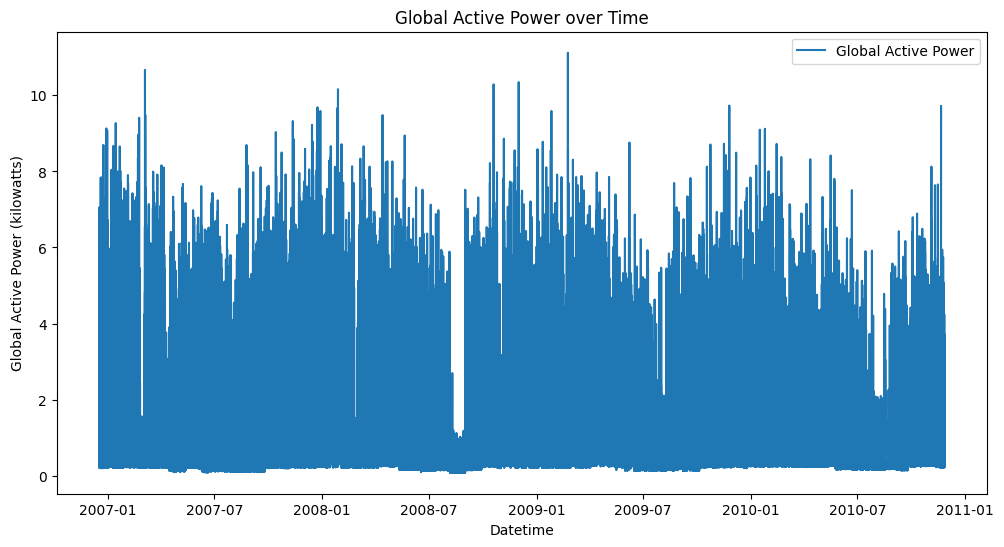

In [6]:
# Example: Plotting Global Active Power over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.title('Global Active Power over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

In [7]:
# Assuming df is already loaded and preprocessed

# Create lagged features
df['Global_active_power_lag1'] = df['Global_active_power'].shift(1)
df['Global_active_power_lag24'] = df['Global_active_power'].shift(24)

# Create rolling mean features
df['Global_active_power_rolling_mean_24'] = df['Global_active_power'].rolling(window=24).mean()
df['Global_active_power_rolling_mean_48'] = df['Global_active_power'].rolling(window=48).mean()

# Create time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.dayofweek
df['Month'] = df.index.month
df['Is_Weekend'] = df['Day'].apply(lambda x: 1 if x >= 5 else 0)

# Create interaction features
df['Hour_Day_Interaction'] = df['Hour'] * df['Day']

# Drop rows with NaN values created by lagging and rolling calculations
df.dropna(inplace=True)

# Display the first few rows of the updated DataFrame
print(df.head())

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 18:35:00                6.072                  0.000   232.48   
2006-12-16 18:36:00                4.536                  0.000   233.54   
2006-12-16 18:37:00                4.408                  0.000   232.32   
2006-12-16 18:38:00                2.912                  0.048   234.02   
2006-12-16 18:39:00                2.326                  0.054   234.76   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 18:35:00              26.4             0.0            27.0   
2006-12-16 18:36:00              19.4             0.0             1.0   
2006-12-16 18:37:00              18.8             0.0             1.0   
2006-12-16 18:38:00              13.0             0.0             1.0   
2006-12-16 18:39:00          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is already prepared with features and target variable
# Define features and target variable
X = df[['Hour', 'Day', 'Month', 'Global_active_power_lag1',
         'Global_active_power_lag24', 'Global_active_power_rolling_mean_24',
         'Is_Weekend', 'Hour_Day_Interaction']]
y = df['Global_active_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

In [1]:
!pip install -q accelerate bitsandbytes

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B", quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
401 Client Error. (Request ID: Root=1-67ba537c-0b4805282459390a30ff3b8e;8e44d7b5-8fdc-4d0b-a3b3-c86d2b8753a3)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Access to model meta-llama/Meta-Llama-3-8B is restricted. You must have access to it and be authenticated to access it. Please log in.